In [2]:
import numpy as np
from utils.SaxImage import SAXImage
    
faces = np.load("../Dataset/SurfaceFiles/faces_fhm_numpy.npy")
# nodes = np.load("../Backup/backup_junio/Old/Predictions_Old/Surface/surface_roi_ds_1_lap_0001/Meshes/1003814/time001/mesh.npy")

nodes = np.load("/home/ngaggion/DATA/HybridGNet3D/Predictions/Surface/ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5/Meshes/1003814/time001/mesh.npy")

subject = "1003814"
time = "time001"

image = "/home/ngaggion/DATA/HybridGNet3D/Dataset/Subjects/" + subject + "/image/" + time + "/SAX"
image = SAXImage(image)

transform = np.array(image.direction).reshape(3, 3).T
nodes = np.dot(nodes - image.origin, transform) + image.origin
np.save("ToPlot/nodes_0.01.npy", nodes)

#nodes = np.load("../Dataset/Subjects/1003814/mesh/time001/surface.npy")


In [2]:
import meshio
import numpy as np
    
faces = np.load("../Dataset/SurfaceFiles/faces_fhm_numpy.npy")
# nodes = np.load("../Backup/backup_junio/Old/Predictions_Old/Surface/surface_roi_ds_1_lap_0001/Meshes/1003814/time001/mesh.npy")

nodes = np.load("ToPlot/nodes_0.1.npy")
#nodes = np.load("../Dataset/Subjects/1003814/mesh/time001/surface.npy")

mesh = meshio.Mesh(nodes, cells = {'triangle': faces})
mesh.write("ToPlot/surface_lambda_0.1.vtk")


In [ ]:
mesh = pyvista.read("ToPlot/surface_lambda_0.1.vtk")

plotter = pyvista.Plotter()
plotter.add_mesh(mesh)
# change view angle
plotter.view_vector([5, -0.5, 10])
plotter.show()
plotter.screenshot("ToPlot/surface_lambda_0.1.png")

In [22]:
import numpy as np
import meshio
from utils.SaxImage import SAXImage
    
faces = np.load("../Dataset/SurfaceFiles/faces_fhm_numpy.npy")

# choosing some subjects from the test set
subjects = ["1003814", "1038548", "1045632", "1049294", "1040266", "1382291", "2367690", "2378758", "2684247", "2816051", "2932352", "2960250", "3858015", "4216935", "4242894", "4304456", "4343728", "4841920", "5080424"]
time = "time001"

for subject in subjects:
    nodes = np.load("/home/ngaggion/DATA/HybridGNet3D/Predictions/Surface/ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5/Meshes/%s/%s/mesh.npy"%(subject, time))
    image = "/home/ngaggion/DATA/HybridGNet3D/Dataset/Subjects/" + subject + "/image/" + time + "/SAX"
    image = SAXImage(image)

    transform = np.array(image.direction).reshape(3, 3).T
    nodes = np.dot(nodes - image.origin, transform) + image.origin
    np.save("ToPlot/nodes_%s.npy"%subject, nodes)

    mesh1 = meshio.Mesh(nodes, cells = {'triangle': faces})
    mesh1.write("ToPlot/subject_%s.vtk"%subject)
    
    plotter = pyvista.Plotter()
    plotter.add_mesh(mesh1)
    # change view angle
    plotter.view_vector([5, -0.5, 10])
    # add title
    plotter.add_text("Prediction", font_size=30)
    plotter.screenshot("ToPlot/subject_%s_pred.png"%subject)
    
    nodes_gt = np.load("/home/ngaggion/DATA/HybridGNet3D/Dataset/Subjects/%s/mesh/%s/surface.npy"%(subject, time))
    #nodes = np.dot(nodes_gt - image.origin, transform) + image.origin
    np.save("ToPlot/nodes_gt_%s.npy"%subject, nodes_gt)
    
    mesh2 = meshio.Mesh(nodes_gt, cells = {'triangle': faces})
    mesh2.write("ToPlot/subject_gt_%s.vtk"%subject)
    
    plotter = pyvista.Plotter()
    plotter.add_mesh(mesh2)
    # change view angle
    plotter.view_vector([5, -0.5, 10])
    plotter.add_text("GT", font_size=30)
    plotter.screenshot("ToPlot/subject_%s_gt.png"%subject)
    
    # euclidean distance between the two meshes
    distance = np.linalg.norm(nodes - nodes_gt, axis = 1)
    mesh_diff = meshio.Mesh(nodes_gt , cells = {'triangle': faces}, point_data = {"Distance": distance})
    mesh_diff.write("ToPlot/subject_diff_%s.vtk"%subject)
    
    mesh_diff = pyvista.read("ToPlot/subject_diff_%s.vtk"%subject)
    
    plotter = pyvista.Plotter()
    # the comparison between the two meshes, will be the distance between the two
    # Add mesh with centered colorbar
    sargs = dict(
        title='Distance (mm)',
        position_x=0.3,  # Center the colorbar horizontally
        position_y=0.05,  # Place at bottom
        width=0.4,  # Make colorbar width 40% of the window
        height=0.05,  # Set colorbar height
        vertical=False,  # Horizontal orientation
        font_family='arial',
        title_font_size=36,
        label_font_size=30,
    )

    plotter.add_mesh(mesh_diff, scalars="Distance", scalar_bar_args=sargs)
    # change view angle
    plotter.view_vector([5, -0.5, 10])
    plotter.screenshot("ToPlot/subject_%s_comparison.png"%subject)

#nodes = np.load("../Dataset/Subjects/1003814/mesh/time001/surface.npy")


2025-01-16 11:02:09.267 ( 922.519s) [    7F02D68F3280] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x7efc1547ec20): Unable to eglMakeCurrent: 12291
2025-01-16 11:02:09.290 ( 922.542s) [    7F02D68F3280] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x7efc1f8f0410): Unable to eglMakeCurrent: 12291
2025-01-16 11:02:09.315 ( 922.567s) [    7F02D68F3280] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x7efc1547ec20): Unable to eglMakeCurrent: 12291
2025-01-16 11:02:09.668 ( 922.920s) [    7F02D68F3280] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x7efc1f8f0410): Unable to eglMakeCurrent: 12291
2025-01-16 11:02:09.685 ( 922.937s) [    7F02D68F3280] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x7efc1f8ef320): Unable to eglMakeCurrent: 12291
2025-01-16 11:02:09.709 ( 922.960s) [    7F02D68F3280] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x7efc1f8f0410): Unable to eglMakeCurrent: 12291
2025-01-16 11:02:09.860 ( 923.112s) [    7F02D

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib.gridspec import GridSpec

def crop_image(img):
    h, w = img.shape[:2]
    crop_h = int(h * 0.1)
    crop_w = int(w * 0.2)
    return img[crop_h:, crop_w:-crop_w]


def create_comparison_grid(subjects, n_rows=5):
    """Create a grid of mesh comparisons with tight column spacing."""
    fig = plt.figure(figsize=(9, n_rows * 3))
    gs = GridSpec(n_rows, 3, figure=fig, 
                 wspace=0,  # very small space between columns
                 hspace=0.02)  # small space between rows
    
    for idx, subject in enumerate(subjects[:n_rows]):
        # Load and crop images
        pred_img = crop_image(mpimg.imread(f"ToPlot/subject_{subject}_pred.png"))
        gt_img = crop_image(mpimg.imread(f"ToPlot/subject_{subject}_gt.png"))
        comp_img = crop_image(mpimg.imread(f"ToPlot/subject_{subject}_comparison.png"))
        
        # Add to grid
        for col, (img, title) in enumerate([(pred_img, 'Prediction'), 
                                          (gt_img, 'Ground Truth'), 
                                          (comp_img, 'Error Map')]):
            ax = fig.add_subplot(gs[idx, col])
            ax.imshow(img)
            ax.axis('off')
            
            if idx == 0:
                ax.set_title(title, fontsize=12, pad=2)
            
            if col == 0:
                ax.text(-0.1, 0.5, f'#{subject}',
                       transform=ax.transAxes,
                       verticalalignment='center',
                       horizontalalignment='right',
                       fontsize=10)
    
    plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
    return fig

# Select subjects
selected_subjects = ["1040266", "1382291", "2367690", "2378758"]
time = "time001"

# Create and save the comparison figure
fig = create_comparison_grid(selected_subjects)
plt.savefig('mesh_comparisons_1.pdf', bbox_inches='tight', dpi=300, pad_inches=0.02)
plt.close(fig)

selected_subjects = subjects[1:9:2]

# Create and save the comparison figure
fig = create_comparison_grid(selected_subjects)
plt.savefig('mesh_comparisons_2.pdf', bbox_inches='tight', dpi=300, pad_inches=0.02)
plt.close(fig)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.007677543..76.90307].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.007677543..76.90307].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.024311183..76.87893].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.024311183..76.87893].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005976096..76.97968].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005976096..76.90578].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0091324

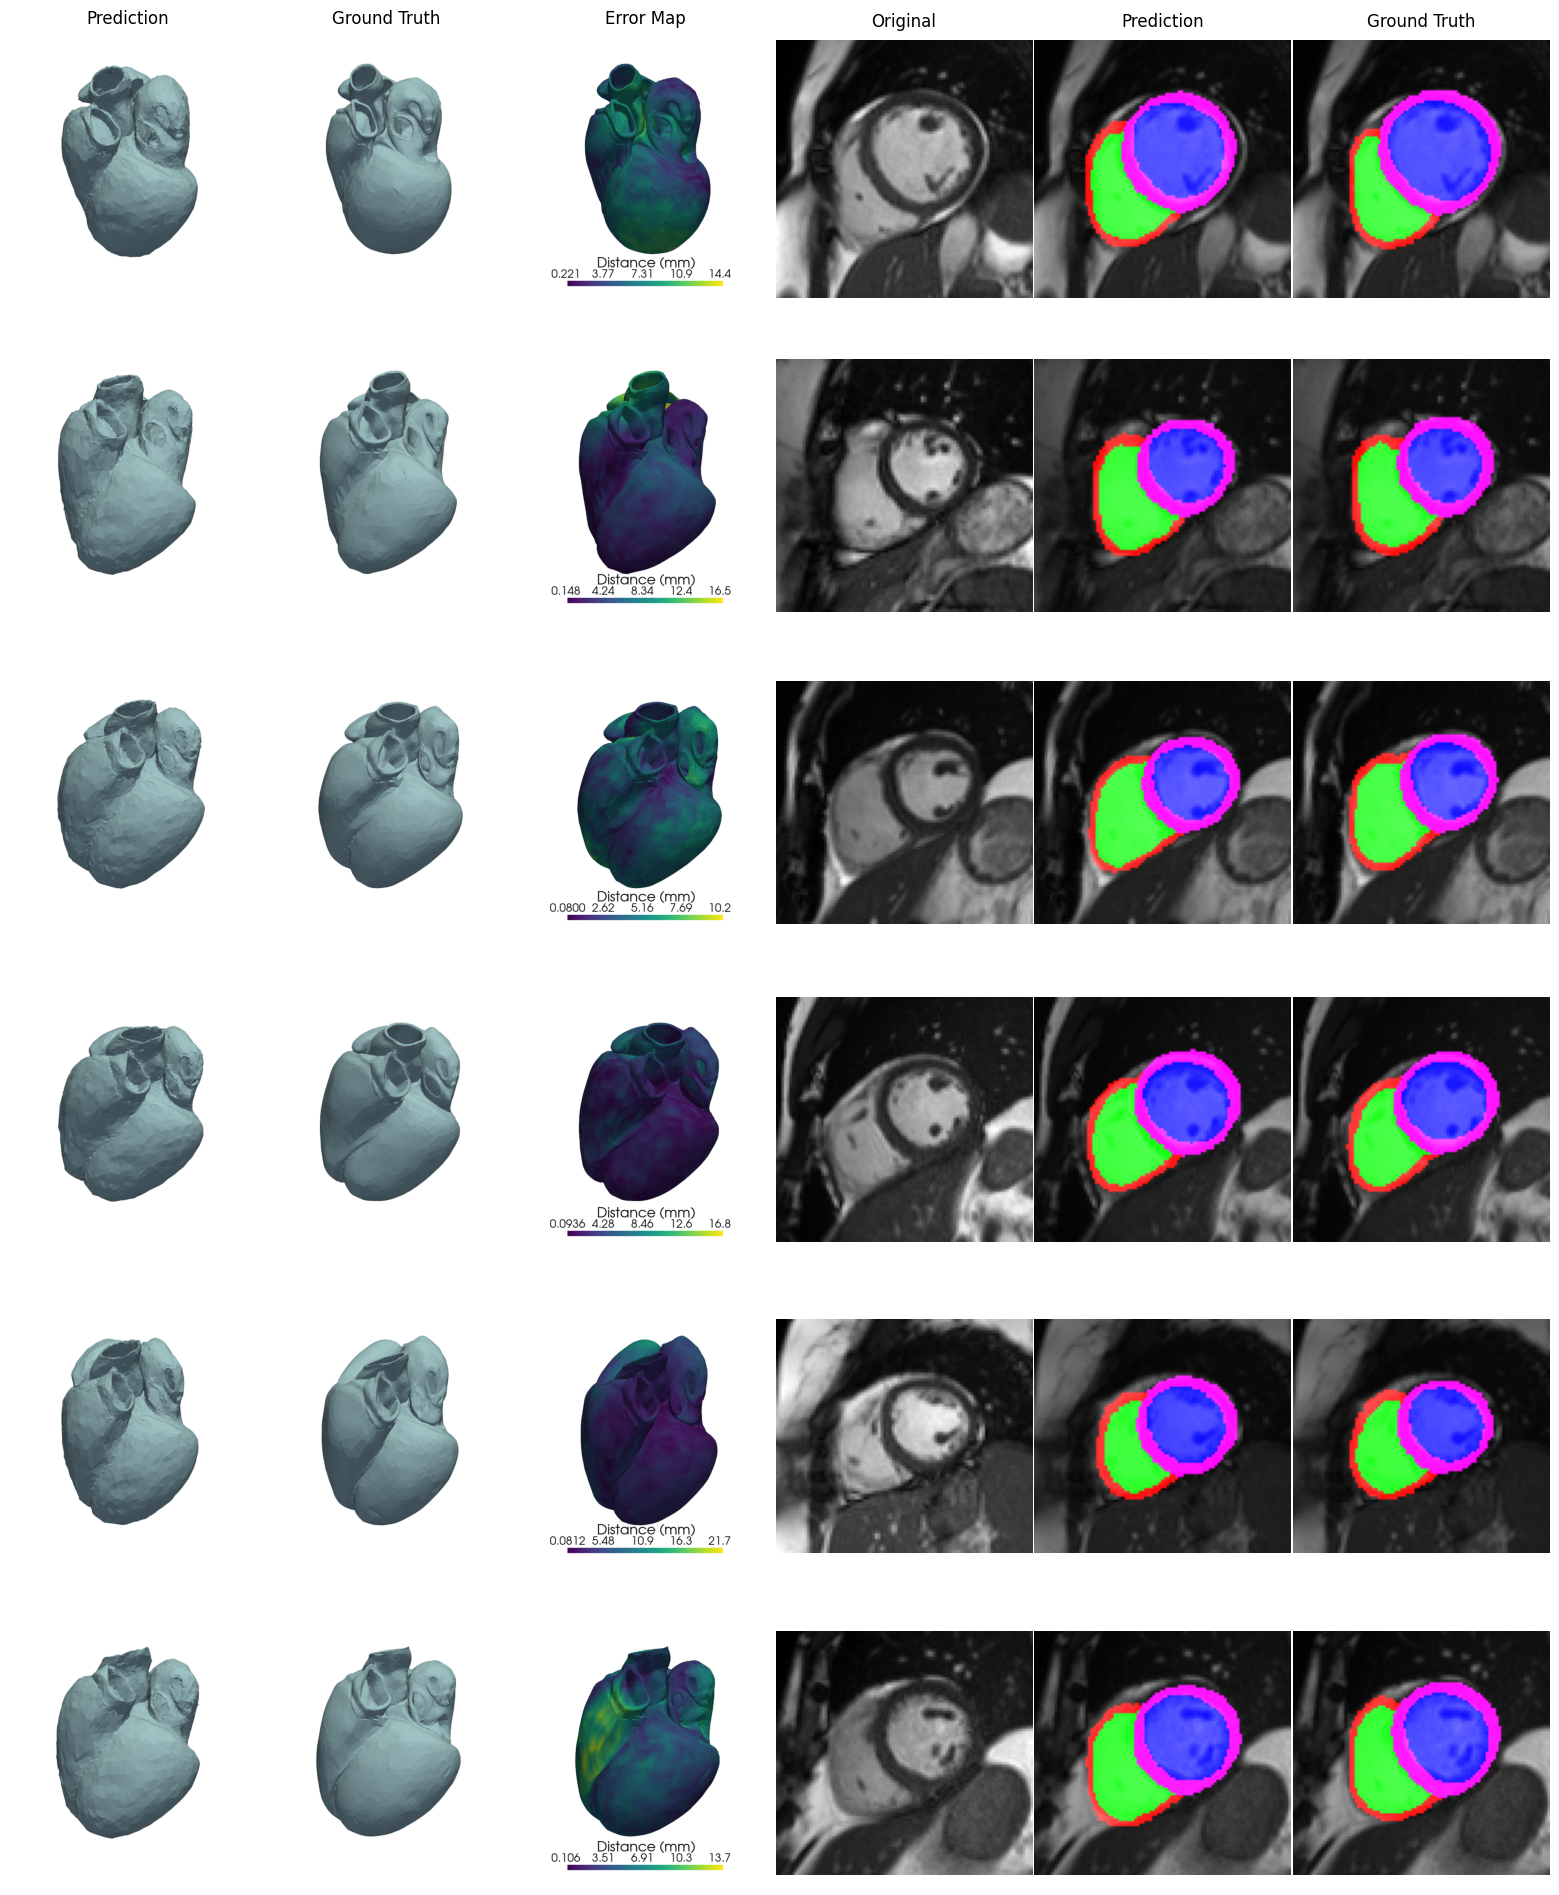

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from matplotlib.gridspec import GridSpec
import os
from utils.SaxImage import SAXImage
import SimpleITK as sitk
import cv2

def load_subject_data(subject_id, timepoint):
    """Load MRI and segmentation data for a given subject and timepoint"""
    # Define paths
    subject = f"../Dataset/Subjects/{subject_id}/image/{timepoint}"
    gt_path = f"../Dataset/Masks/{subject_id}/{timepoint}"
    segpath = f"../Predictions/Surface/ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5/Masks/{subject_id}/{timepoint}"
    
    # Load SAX image
    SAX_PATH = os.path.join(subject, "SAX")
    SaxImage = SAXImage(SAX_PATH)
    SaxImage_array = SaxImage.pixel_array()
    SaxImage_array = (SaxImage_array - np.min(SaxImage_array)) / (np.max(SaxImage_array) - np.min(SaxImage_array))
    
    # Load segmentation
    Segmentation = sitk.ReadImage(os.path.join(segpath, "mask.nii.gz"))
    Segmentation_array = sitk.GetArrayFromImage(Segmentation)
    Segmentation_array = np.transpose(Segmentation_array, (1, 2, 0))
    
    # Load ground truth
    GroundTruth = sitk.ReadImage(os.path.join(gt_path, "mask.nii.gz"))
    GroundTruth_array = sitk.GetArrayFromImage(GroundTruth)
    GroundTruth_array = np.transpose(GroundTruth_array, (1, 2, 0))
    
    return SaxImage_array, Segmentation_array, GroundTruth_array

def get_roi_bounds(mask_array):
    """Get the ROI boundaries where segmentation exists"""
    indices = np.where(mask_array > 0)
    if len(indices[0]) == 0:
        return None
    padding = 20
    y_min = max(0, np.min(indices[0]) - padding)
    y_max = min(mask_array.shape[0], np.max(indices[0]) + padding)
    x_min = max(0, np.min(indices[1]) - padding)
    x_max = min(mask_array.shape[1], np.max(indices[1]) + padding)
    return y_min, y_max, x_min, x_max

def create_overlay(image, mask, colors, labels):
    """Create an RGB overlay of the mask on the image"""
    overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    for label, color in zip(labels, colors):
        mask_binary = (mask == label).astype(np.uint8)
        for c in range(3):
            overlay[:, :, c] = np.where(mask_binary == 1,
                                      overlay[:, :, c] * 0.7 + color[c] * 0.3,
                                      overlay[:, :, c])
    return overlay

def crop_image(img):
    h, w = img.shape[:2]
    crop_h = int(h * 0.1)
    crop_w = int(w * 0.2)
    return img[crop_h:, crop_w:-crop_w]

def create_visualization(subject_ids, timepoint="time001", labels=[50, 100, 150, 200, 250],
                        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (255, 0, 255)]):
    """Create visualization with meshes on left and segmentations on right"""
    
    # Create figure with GridSpec
    n_subjects = len(subject_ids)
    fig = plt.figure(figsize=(20, 4 * n_subjects))
    
    # Create GridSpec with 6 columns: 3 for meshes, 3 for slices
    gs = GridSpec(n_subjects, 6, figure=fig, wspace=0.01)
        
    for idx, subject in enumerate(subject_ids):
        try:
            # Load and plot mesh comparisons first (left side)
            pred_img = crop_image(mpimg.imread(f"ToPlot/subject_{subject}_pred.png"))
            gt_img = crop_image(mpimg.imread(f"ToPlot/subject_{subject}_gt.png"))
            comp_img = crop_image(mpimg.imread(f"ToPlot/subject_{subject}_comparison.png"))
                        
            for col, (img, title) in enumerate([(pred_img, 'Prediction'),
                                              (gt_img, 'Ground Truth'),
                                              (comp_img, 'Error Map')]):
                ax = fig.add_subplot(gs[idx, col])
                ax.imshow(img)
                ax.axis('off')
                if idx == 0:
                    ax.set_title(title, pad=10)
                """
                if col == 0:
                    if idx < 4:
                        label = f"Healthy"
                    else:
                        label = f"Myocardial Infarction"
                    ax.text(0.1, 0.5, label,
                           transform=ax.transAxes,
                           verticalalignment='center',
                           horizontalalignment='right',
                           rotation=90,
                           fontsize=16)
                """
            # Load MRI and segmentation data (right side)
            SaxImage_array, Segmentation_array, GroundTruth_array = load_subject_data(subject, timepoint)
            
            # Get middle slice
            slice_idx = SaxImage_array.shape[2] // 2
            
            # Get ROI bounds
            combined_mask = np.logical_or(Segmentation_array[:, :, slice_idx] > 0,
                                        GroundTruth_array[:, :, slice_idx] > 0)
            bounds = get_roi_bounds(combined_mask)
            if bounds is not None:
                y_min, y_max, x_min, x_max = bounds
                
                # Plot slice visualizations
                # Original
                ax = fig.add_subplot(gs[idx, 3])
                ax.imshow(SaxImage_array[y_min:y_max, x_min:x_max, slice_idx], cmap='gray')
                if idx == 0:
                    ax.set_title('Original', pad=10)
                ax.axis('off')
                
                # Prediction overlay
                ax = fig.add_subplot(gs[idx, 4])
                pred_overlay = create_overlay(SaxImage_array[y_min:y_max, x_min:x_max, slice_idx].copy(),
                                           Segmentation_array[y_min:y_max, x_min:x_max, slice_idx],
                                           colors, labels)
                ax.imshow(pred_overlay)
                if idx == 0:
                    ax.set_title('Prediction', pad=10)
                ax.axis('off')
                
                # Ground truth overlay
                ax = fig.add_subplot(gs[idx, 5])
                gt_overlay = create_overlay(SaxImage_array[y_min:y_max, x_min:x_max, slice_idx].copy(),
                                         GroundTruth_array[y_min:y_max, x_min:x_max, slice_idx],
                                         colors, labels)
                ax.imshow(gt_overlay)
                if idx == 0:
                    ax.set_title('Ground Truth', pad=10)
                ax.axis('off')
                                    
        except Exception as e:
            print(f"Error processing subject {subject}: {e}")
            continue

    return fig

# Example usage, first 4 are healthy
#selected_subjects = ["1003814", "1038548", "1045632", "1049294", "1040266", "1382291", "2367690", "2378758", "2684247", "2816051"]
selected_subjects = ["1003814", "1038548", "1045632", "1049294", "1040266", "1382291"]
timepoint = "time001"

# Create and save the visualization
fig = create_visualization(selected_subjects, timepoint)
plt.savefig('combined_visualization.pdf', bbox_inches='tight', dpi=300, pad_inches=0.02)
plt.show()